In [179]:
import numpy as np
import pandas as pd
import re
import string,time
import nltk
import emoji
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from joblib import dump




In [180]:
# Reading the file 
data = pd.read_excel("/home/student/Downloads/Deep_Learning_Project/archive/tweet.xlsx")
data.head()

,text,label,Age,Gender,Age Category
0,let Gather For Party,0.0,16.0,Male,Teen Age
1,I hate being alive when I feel so dead inside.,1.0,17.0,Female,Teen Age
2,Exam are Comimg I m already Feeling Very Dep...,1.0,16.0,Male,Teen Age
3,Nice picture,0.0,16.0,Male,Teen Age
4,"Feeling worried, even though you actually have...",1.0,16.0,Male,Teen Age


In [181]:
data.columns

Index(['text', 'label', 'Age', 'Gender', 'Age Category'], dtype='object')

In [182]:
data.shape

(7489, 5)

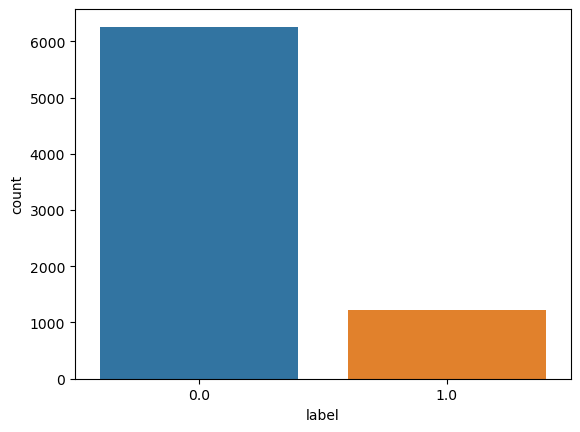

In [183]:
air_plot = sns.countplot(x = "label",data = data)

In [184]:
data['Age'].unique()

array([16., 17., nan, 14., 15., 13.])

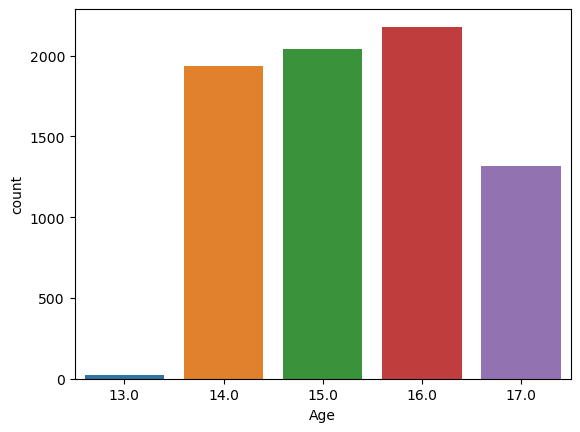

In [185]:
#plotting the Age data

air_plot = sns.countplot(x = "Age",data = data)

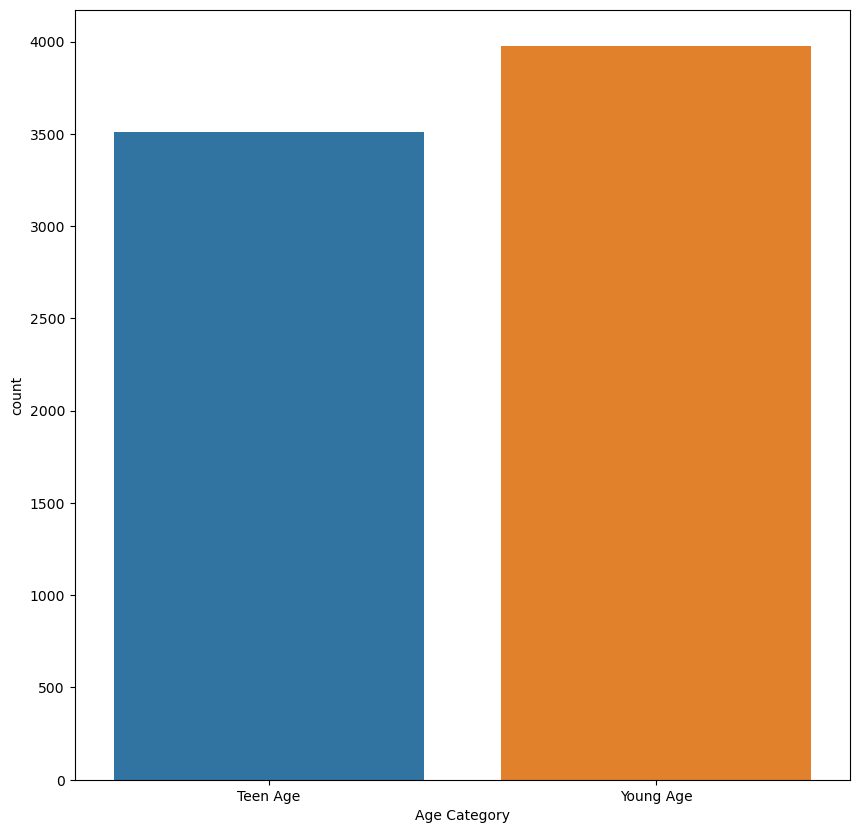

In [186]:
# Ages of children 

plt.figure(figsize = (10,10))
air_plot = sns.countplot(x = 'Age Category',data = data)


Glimpse of Relation Between Label and Age Group of Students :


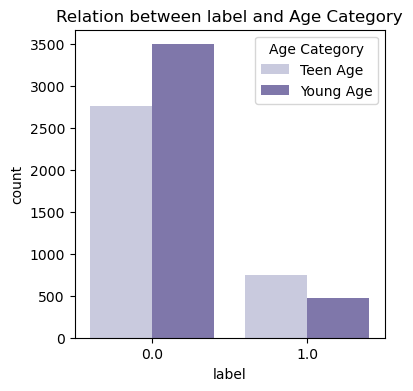

In [187]:
# Presenting the label and category

print(f"\nGlimpse of Relation Between Label and Age Group of Students :")
plt.figure(figsize=(4, 4))
sns.countplot(x='label', hue='Age Category', data=data, palette='Purples')
plt.title('Relation between label and Age Category')
plt.show()


Glimpse of Relation Between Gender and Age  of Students :


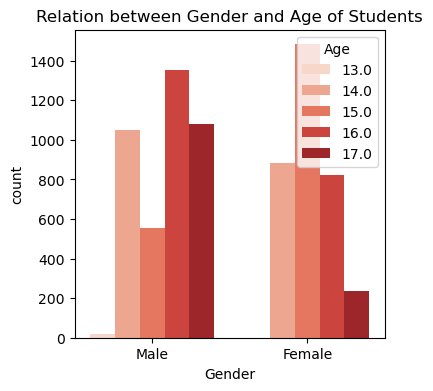

In [188]:
# Relation between Gender and Age of Students

print(f"\nGlimpse of Relation Between Gender and Age  of Students :")
plt.figure(figsize=(4, 4))
sns.countplot(x='Gender', hue='Age', data=data, palette='Reds')
plt.title('Relation between Gender and Age of Students')
plt.show()

In [189]:
data['text'].head()

0                                 let Gather For Party
1      I hate being alive when I feel so dead inside. 
2    Exam are Comimg I  m already  Feeling Very Dep...
3                                         Nice picture
4    Feeling worried, even though you actually have...
Name: text, dtype: object

In [190]:
# Removing html tags
def remove_html_tags(review):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',str(review))

data['text'] = data['text'].apply(remove_html_tags)

In [191]:
data['text'].head()

0                                 let Gather For Party
1      I hate being alive when I feel so dead inside. 
2    Exam are Comimg I  m already  Feeling Very Dep...
3                                         Nice picture
4    Feeling worried, even though you actually have...
Name: text, dtype: object

In [192]:
# Removing URL's  
def remove_url(review):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',review)


data['text'] = data['text'].apply(remove_url)
data['text'][:10]

0                                 let Gather For Party
1      I hate being alive when I feel so dead inside. 
2    Exam are Comimg I  m already  Feeling Very Dep...
3                                         Nice picture
4    Feeling worried, even though you actually have...
5    There are people who died, their friends didn'...
6                                    keep it up hahaha
7          The match cycle I had.Buy-brought-out-lost.
8    nctb! jewel case dream, which doesn't have a p...
9    college but it's like not going to college, bu...
Name: text, dtype: object

In [193]:
# Removing Punctutaions
exclude = string.punctuation

def remove_punc(review):
    for char in exclude:
        review = review.replace(char,'')
        
    return review

start = time.time()
data['text'] = data['text'].apply(remove_punc)
time1 = time.time() - start
print(time1)
data['text'][:10]

0.01956772804260254


0                                 let Gather For Party
1       I hate being alive when I feel so dead inside 
2    Exam are Comimg I  m already  Feeling Very Dep...
3                                         Nice picture
4    Feeling worried even though you actually have ...
5    There are people who died their friends didnt ...
6                                    keep it up hahaha
7               The match cycle I hadBuybroughtoutlost
8    nctb jewel case dream which doesnt have a post...
9    college but its like not going to college but ...
Name: text, dtype: object

In [194]:
# Chat Word Treatment
# rofl.lmao,jmho,fyi,asap,gn  
acronyms_data = {
    
    'AFAIK': 'As Far As I Know',
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'B4N': 'Bye For Now',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': 'For What It\'s Worth',
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GM': 'Good Morning',
    'TL': 'Talk Later',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you (also a chat program)',
    'ILU': 'I Love You',
    'IMHO': 'In My Honest/Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple, Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My A.. Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'PITA': 'Pain In The A..',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My A.. Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The F...',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait...',
    '7K': 'Sick:-D Laughter',
    'TFW': 'That feeling when. TFW internet slang often goes in a caption to an image.',
    'MFW': 'My face when',
    'MRW': 'My reaction when',
    'IFYP': 'I feel your pain',
    'LOL': 'Laughing out loud',
    'TNTL': 'Trying not to laugh',
    'JK': 'Just kidding',
    'IDC': 'I don’t care',
    'ILY': 'I love you',
    'IMU': 'I miss you',
    'ADIH': 'Another day in hell',
    'IDC': 'I don’t care',
    'ZZZ': 'Sleeping, bored, tired',
    'WYWH': 'Wish you were here',
    'TIME': 'Tears in my eyes',
    'BAE': 'Before anyone else',
    'FIMH': 'Forever in my heart',
    'BSAAW': 'Big smile and a wink',
    'BWL': 'Bursting with laughter',
    'LMAO': 'Laughing my a** off',
    'BFF': 'Best friends forever',
    'CSL': 'Can’t stop laughing',
}


def chat_conversion(review):
    new_text = []
    for w in review.split():
        if w.upper() in acronyms_data:
            new_text.append(acronyms_data[w.upper()])
        else:
            new_text.append(w)
            
    return " ".join(new_text)
    
data['text'] = data['text'].apply(chat_conversion)
data['text'][:10]

0                                 let Gather For Party
1        I hate being alive when I feel so dead inside
2    Exam are Comimg I m already Feeling Very Depre...
3                                         Nice picture
4    Feeling worried even though you actually have ...
5    There are people who died their friends didnt ...
6                                    keep it up hahaha
7               The match cycle I hadBuybroughtoutlost
8    nctb jewel case dream which doesnt have a post...
9    college but its like not going to college but ...
Name: text, dtype: object

In [195]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [196]:
# Removing stop words like a,the,me,i
stopwords.words('english')

def remove_stopwords(review):
    new_text = []
    for word in review.split():
        if word in stopwords.words('english'):
            new_text.append('')
            
        else:
            new_text.append(word)
            
        x = new_text[:]
        new_text.clear()
        return ' '.join(x)
    
data['text'].apply(remove_stopwords)
data['text'][:10]

0                                 let Gather For Party
1        I hate being alive when I feel so dead inside
2    Exam are Comimg I m already Feeling Very Depre...
3                                         Nice picture
4    Feeling worried even though you actually have ...
5    There are people who died their friends didnt ...
6                                    keep it up hahaha
7               The match cycle I hadBuybroughtoutlost
8    nctb jewel case dream which doesnt have a post...
9    college but its like not going to college but ...
Name: text, dtype: object

In [197]:
import re

emoji.demojize(data['text'])
data['text'][:10]

0                                 let Gather For Party
1        I hate being alive when I feel so dead inside
2    Exam are Comimg I m already Feeling Very Depre...
3                                         Nice picture
4    Feeling worried even though you actually have ...
5    There are people who died their friends didnt ...
6                                    keep it up hahaha
7               The match cycle I hadBuybroughtoutlost
8    nctb jewel case dream which doesnt have a post...
9    college but its like not going to college but ...
Name: text, dtype: object

In [198]:
# Tokenization breaking text into smaller parts use regular expression which will be easier 
def clean_the_tweet(review):
    tokens= nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",review))
    tokens = [token.lower() for token in tokens]
    return ' '.join(tokens[:])

data['text'] = data['text'].apply(clean_the_tweet)
data['text'][:10]

0                                 let gather for party
1        i hate being alive when i feel so dead inside
2    exam are comimg i m already feeling very depre...
3                                         nice picture
4    feeling worried even though you actually have ...
5    there are people who died their friends didnt ...
6                                    keep it up hahaha
7               the match cycle i hadbuybroughtoutlost
8    nctb jewel case dream which doesnt have a post...
9    college but its like not going to college but ...
Name: text, dtype: object

In [199]:
''' Inflection which mean modification to express different grammatical categories such as 
tense, case, voice, aspect, person , number, gender and mood
Stemming is the process of reducing inflection in words to their root forms such as mapping a group of of words
to the same stem even if the stem itself is not a valid word in the language. It is used when we need speed or want 
our job to be done quickly as possible . But if we want to show the output to the user lemmatization is preferred 
which is a bit slower'''

ps = PorterStemmer()
def stem_words(review):
    
    return " ".join([ps.stem(word) for word in str(review).split()])

data['text'] = data['text'].apply(stem_words)
data['text'][:10]


0                                 let gather for parti
1             i hate be aliv when i feel so dead insid
2        exam are comimg i m alreadi feel veri depress
3                                          nice pictur
4    feel worri even though you actual have a god w...
5    there are peopl who die their friend didnt sup...
6                                    keep it up hahaha
7                the match cycl i hadbuybroughtoutlost
8    nctb jewel case dream which doesnt have a post...
9    colleg but it like not go to colleg but not on...
Name: text, dtype: object

In [200]:
# Removing the neutral sentiment and encoding the positive as 1 and negative as 0

data['cleaned_tweet'] = data['text'].apply(clean_the_tweet)
data['text'].head()

data['label'] .head()
data['cleaned_tweet'].head()

0                                 let gather for parti
1             i hate be aliv when i feel so dead insid
2        exam are comimg i m alreadi feel veri depress
3                                          nice pictur
4    feel worri even though you actual have a god w...
Name: cleaned_tweet, dtype: object

In [201]:
data['cleaned_tweet'].iloc[2762:2768]

2762    so proud of dreami they must be veri happi
2763                    ywa ka bipolar ba nimo oyi
2764                      it easi to make it viral
2765           yuuhi no oyama ni keep it up momiji
2766                                         dizzi
2767                          good morn talk later
Name: cleaned_tweet, dtype: object

In [202]:
# Printing Confusion matrix 
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [203]:
# To check the acurracies,recall,f_1 score,precision  in train and test set

def check_scores(model, x_train, x_test, y_train, y_test):
    # Train the model
    model.fit(x_train.toarray(), y_train)

    # Predict on training and test sets
    train_predictions = (model.predict(x_train.toarray()) > 0.5).astype("int32").flatten()
    test_predictions = (model.predict(x_test.toarray()) > 0.5).astype("int32").flatten()

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)


    train_recall = recall_score(y_train, train_predictions, average='weighted')
    test_recall = recall_score(y_test, test_predictions, average='weighted')
    
    
    train_precision = precision_score(y_train, train_predictions, average='weighted')
    test_precision = precision_score(y_test, test_predictions, average='weighted')
    

    train_f1 = f1_score(y_train, train_predictions, average='weighted')
    test_f1 = f1_score(y_test, test_predictions, average='weighted')
    
    plot_confusion_matrix(y_train, train_predictions, title='Confusion Matrix - Train Set')
    plot_confusion_matrix(y_test, test_predictions, title='Confusion Matrix - Test Set')

    return {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        
        'train_recall': train_recall,
        'test_recall': test_recall,

        'train_precision': train_precision,
        'test_precision': test_precision,

        'train_f1': train_f1,
        'test_f1': test_f1
    }




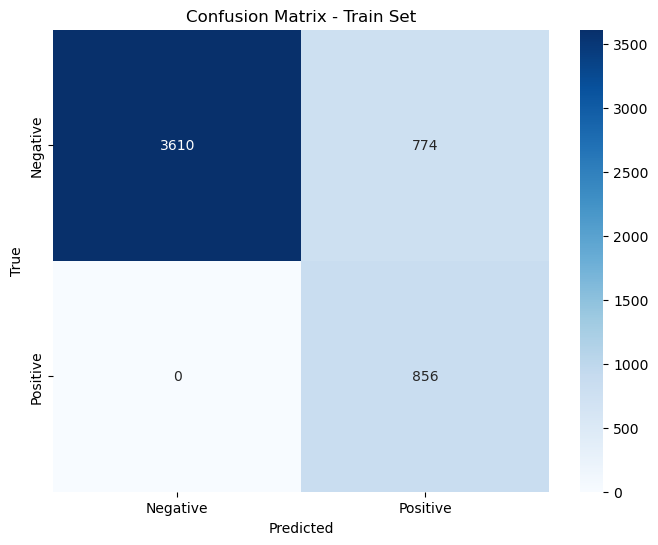

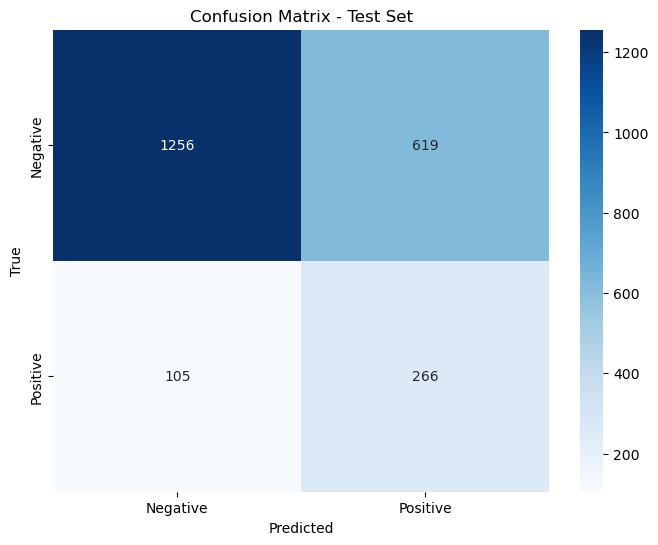

Training Accuracy:   0.8522900763358778
Test Accuracy:       0.6776491540516474

Training Precision:  0.9224296351800684
Test Precision:      0.8200600796227867

Training Recall:     0.8522900763358778
Test Recall:         0.6776491540516474

Training F1 Score:   0.8681335097175688
Test F1 Score:       0.7180070926753708


In [207]:

# Creating object of TF-IDF vectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf = vectorizer.fit_transform(data.cleaned_tweet)

# Ensure there are no NaN values in the target variable
data = data.dropna(subset=['label'])

# Make sure the number of samples in X_tf_idf and data['label'] are consistent
X_tf_idf = X_tf_idf[:data.shape[0]]
data['label'] = data['label'].astype(int)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_tf_idf, data['label'],test_size = 0.3, random_state=42)

# Create and evaluate Gaussian Naive Bayes model
gnb = GaussianNB()


# Create and evaluate Gaussian Naive Bayes model
scores = check_scores(gnb, x_train, x_test, y_train, y_test)

print("Training Accuracy:  ", scores['train_accuracy'])
print("Test Accuracy:      ", scores['test_accuracy'])


print("\nTraining Precision: ", scores['train_precision'])
print("Test Precision:     ", scores['test_precision'])


print("\nTraining Recall:    ", scores['train_recall'])
print("Test Recall:        ", scores['test_recall'])


print("\nTraining F1 Score:  ", scores['train_f1'])
print("Test F1 Score:      ", scores['test_f1'])




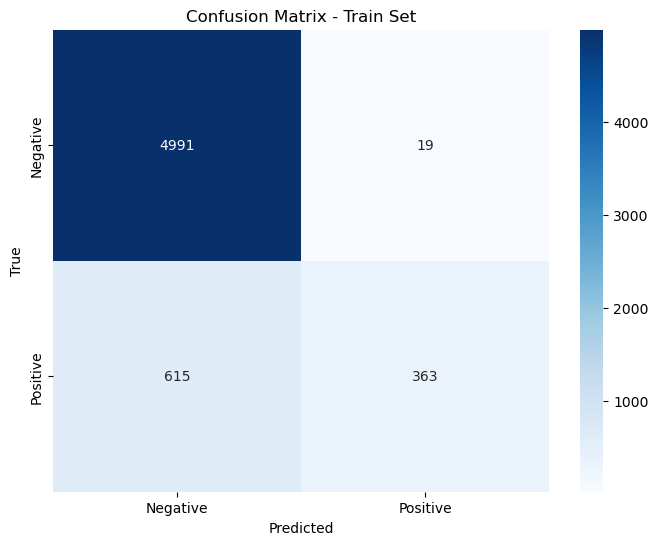

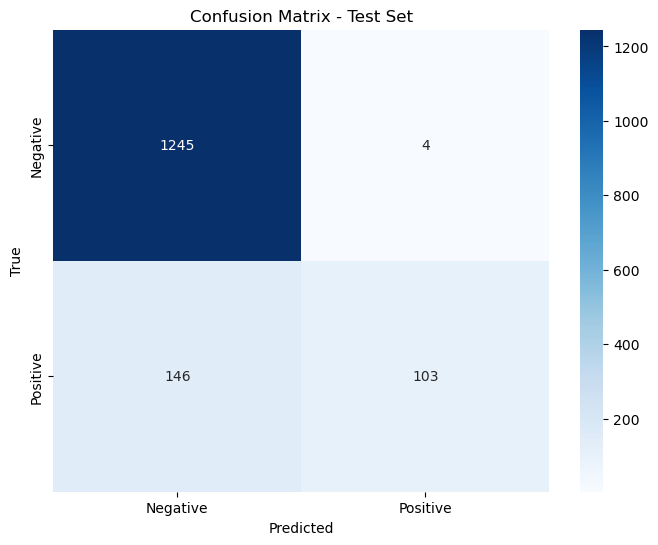

Training Accuracy:   0.894121576486306
Test Accuracy:       0.8998664886515354

Training Precision:  0.900090103306957
Test Precision:      0.9062723458740577

Training Recall:     0.894121576486306
Test Recall:         0.8998664886515354

Training F1 Score:   0.8738938413641859
Test F1 Score:       0.8825890257490068


In [143]:
# Decision tree implementation
modelw = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_model  = check_scores(modelw, x_train, x_test, y_train, y_test)

print("Training Accuracy:  ", dt_model['train_accuracy'])
print("Test Accuracy:      ",dt_model['test_accuracy'])


print("\nTraining Precision: ", dt_model['train_precision'])
print("Test Precision:     ",dt_model['test_precision'])


print("\nTraining Recall:    ", dt_model['train_recall'])
print("Test Recall:        ",dt_model['test_recall'])


print("\nTraining F1 Score:  ", dt_model['train_f1'])
print("Test F1 Score:      ", dt_model['test_f1'])



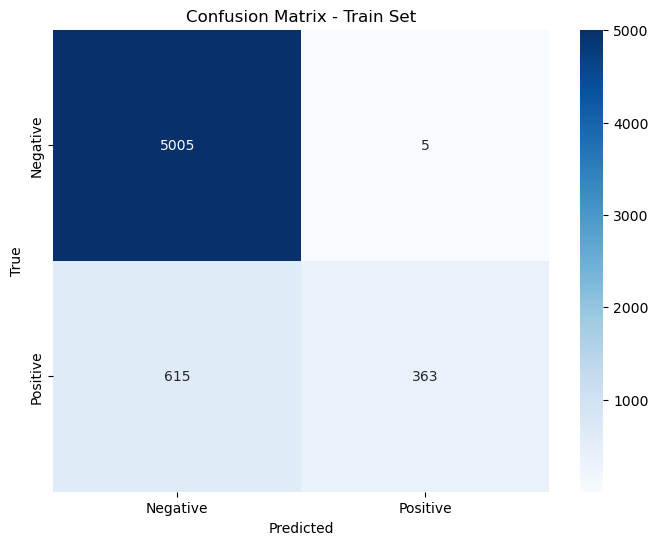

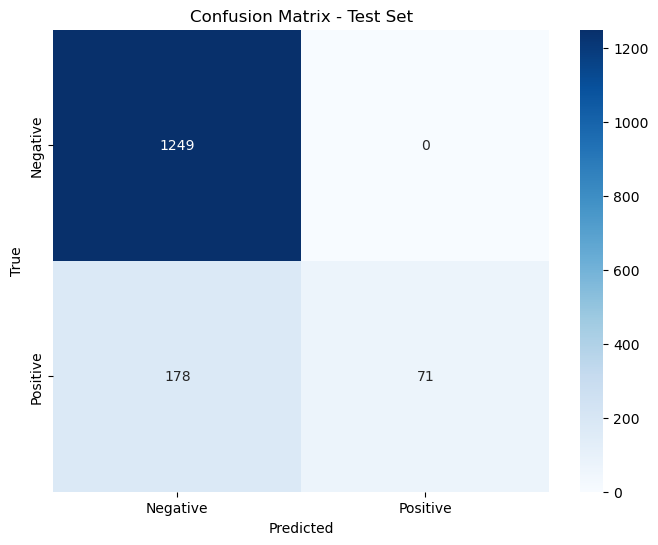

Training Accuracy:   0.8964595858383434
Test Accuracy:       0.8811748998664887

Training Precision:  0.9062232173615372
Test Precision:      0.8959968114458615

Training Recall:     0.8964595858383434
Test Recall:         0.8811748998664887

Training F1 Score:   0.8759684258319392
Test F1 Score:       0.8520786247632619


In [144]:
# Implementation using Naive Bayes with Decision Tree
gb = GaussianNB()
nb_model = DecisionTreeClassifier(max_depth=2, random_state=42)
# Assuming nb_model and dt_model are already defined
voting_class = VotingClassifier(estimators=[('Decision Tree', nb_model), ('Naive Bayes', gb)], voting='hard')

nb_dt = check_scores(voting_class, x_train, x_test, y_train, y_test)
print("Training Accuracy:  ", nb_dt['train_accuracy'])
print("Test Accuracy:      ", nb_dt['test_accuracy'])

print("\nTraining Precision: ", nb_dt['train_precision'])
print("Test Precision:     ", nb_dt['test_precision'])

print("\nTraining Recall:    ", nb_dt['train_recall'])
print("Test Recall:        ", nb_dt['test_recall'])

print("\nTraining F1 Score:  ", nb_dt['train_f1'])
print("Test F1 Score:      ", nb_dt['test_f1'])


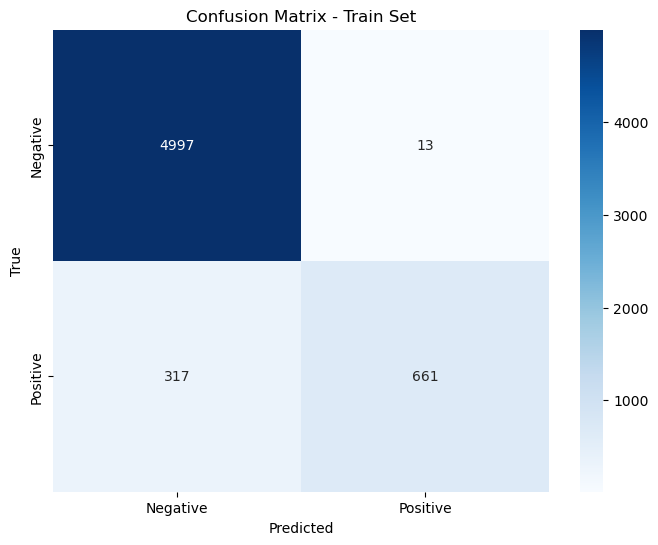

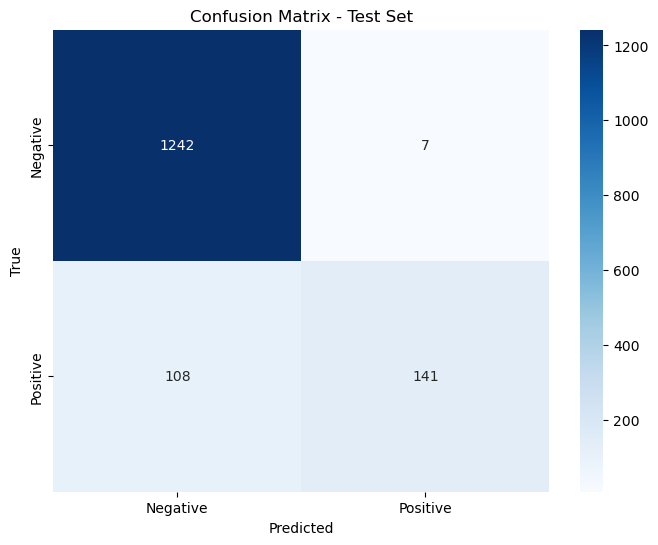

Training Accuracy:   0.9448897795591182
Test Accuracy:       0.9232309746328438

Training Precision:  0.946939084325838
Test Precision:      0.9254358965106629

Training Recall:     0.9448897795591182
Test Recall:         0.9232309746328438

Training F1 Score:   0.9406304919537533
Test F1 Score:       0.9149573096116593


['/home/student/Downloads/my_model.joblib']

In [164]:
# Logistic Regression

modelx = LogisticRegression(random_state=42)
l_r = check_scores(modelx, x_train, x_test, y_train, y_test)

print("Training Accuracy:  ", l_r['train_accuracy'])
print("Test Accuracy:      ", l_r['test_accuracy'])

print("\nTraining Precision: ", l_r['train_precision'])
print("Test Precision:     ", l_r['test_precision'])

print("\nTraining Recall:    ", l_r['train_recall'])
print("Test Recall:        ", l_r['test_recall'])

print("\nTraining F1 Score:  ", l_r['train_f1'])
print("Test F1 Score:      ", l_r['test_f1'])


from joblib import dump


model_save_path = '/home/student/Downloads/my_model.joblib'
dump(l_r, model_save_path)





Epoch 1/5
188/188 [==============================] - 37s 193ms/step - loss: 0.2850 - accuracy: 0.8878
Epoch 2/5
188/188 [==============================] - 36s 192ms/step - loss: 0.0963 - accuracy: 0.9674
Epoch 3/5
188/188 [==============================] - 36s 193ms/step - loss: 0.0496 - accuracy: 0.9853
Epoch 4/5
188/188 [==============================] - 36s 194ms/step - loss: 0.0302 - accuracy: 0.9920
Epoch 5/5
47/47 [==============================] - 1s 11ms/step
 Train Accuracy is : 0.9978289913159653
 Test Accuracy is : 0.945260347129506
 Train Recall is : 0.9978289913159653
 Test Recall is : 0.945260347129506
 Train F1 is : 0.9978276487786032
 Test F1 is : 0.9438306712314463
 Train Precision is : 0.997827221599362
 Test Precision is : 0.9437596010391999


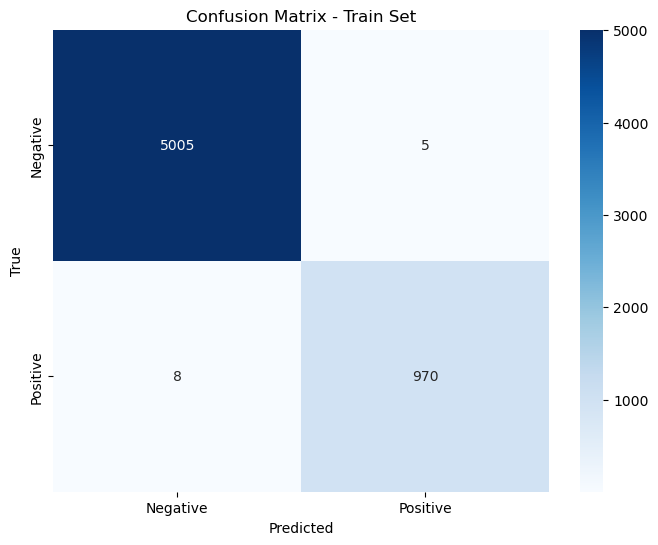

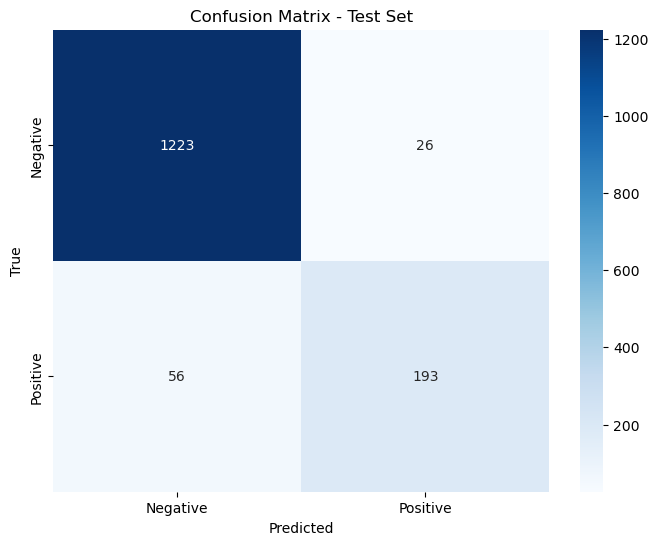

In [149]:
learning_rate = 0.001
rnn = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu', input_shape=(X_tf_idf.shape[1],)),  # Use the number of features as input shape
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=learning_rate)
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


rnn.fit(x_train.toarray(), y_train,epochs = 5)

train_predictions = (rnn.predict(x_train.toarray()) > 0.5).astype("int32").flatten()
test_predictions = (rnn.predict(x_test.toarray()) > 0.5).astype("int32").flatten()

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)


train_recall = recall_score(y_train, train_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
    
    
train_precision = precision_score(y_train, train_predictions, average='weighted')
test_precision = precision_score(y_test, test_predictions, average='weighted')
    

train_f1 = f1_score(y_train, train_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')


print(f" Train Accuracy is : {train_accuracy}")
print(f" Test Accuracy is : {test_accuracy}")

print(f" Train Recall is : {train_recall}")
print(f" Test Recall is : {test_recall}")

print(f" Train F1 is : {train_f1}")
print(f" Test F1 is : {test_f1}")

print(f" Train Precision is : {train_precision}")
print(f" Test Precision is : {test_precision}")


plot_confusion_matrix(y_train, train_predictions, title='Confusion Matrix - Train Set')
plot_confusion_matrix(y_test, test_predictions, title='Confusion Matrix - Test Set')

scores2 = {
    'test_accuracy': test_accuracy,
    'test_recall': test_recall,
    'test_precision': test_precision,
    'test_f1': test_f1
}

Epoch 1/20
188/188 [==============================] - 5s 27ms/step - loss: 0.6227 - accuracy: 0.8146
Epoch 2/20
188/188 [==============================] - 5s 28ms/step - loss: 0.4802 - accuracy: 0.8367
Epoch 3/20
188/188 [==============================] - 6s 34ms/step - loss: 0.4060 - accuracy: 0.8367
Epoch 4/20
188/188 [==============================] - 6s 31ms/step - loss: 0.3555 - accuracy: 0.8402
Epoch 5/20
188/188 [==============================] - 6s 30ms/step - loss: 0.3001 - accuracy: 0.8604
Epoch 6/20
188/188 [==============================] - 6s 30ms/step - loss: 0.2475 - accuracy: 0.9023
Epoch 7/20
188/188 [==============================] - 6s 30ms/step - loss: 0.2053 - accuracy: 0.9269
Epoch 8/20
188/188 [==============================] - 6s 32ms/step - loss: 0.1725 - accuracy: 0.9456
Epoch 9/20
188/188 [==============================] - 6s 32ms/step - loss: 0.1490 - accuracy: 0.9561
Epoch 10/20
188/188 [==============================] - 6s 34ms/step - loss: 0.1304 - accura

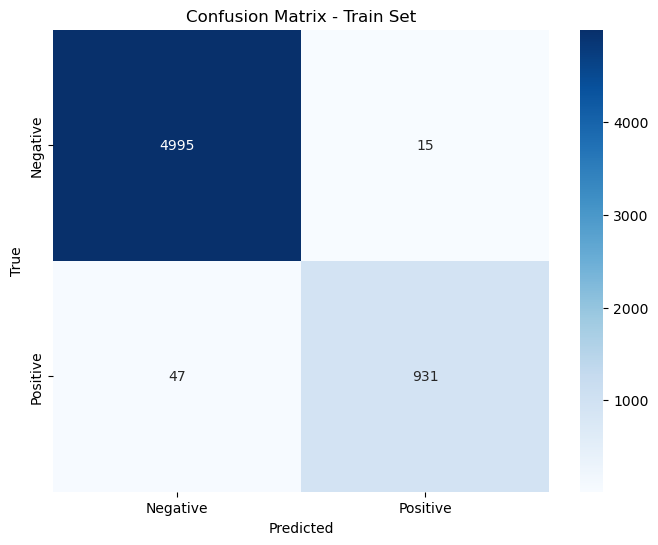

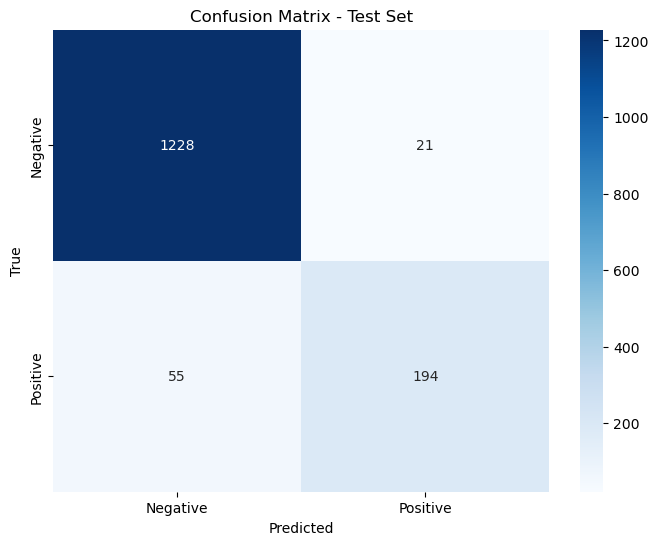

In [170]:
learning_rate = 0.0001

lstm = Sequential([
    Flatten(input_shape=(X_tf_idf.shape[1],)),
    Dense(512, activation='relu'),
    
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=learning_rate)
lstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


lstm.fit(x_train.toarray(), y_train, epochs=20)

train_predictions = (lstm.predict(x_train.toarray()) > 0.5).astype("int32").flatten()
test_predictions = (lstm.predict(x_test.toarray()) > 0.5).astype("int32").flatten()

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

train_recall = recall_score(y_train, train_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')

train_precision = precision_score(y_train, train_predictions, average='weighted')
test_precision = precision_score(y_test, test_predictions, average='weighted')

train_f1 = f1_score(y_train, train_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

print(f"Train Recall: {train_recall}")
print(f"Test Recall: {test_recall}")

print(f"Train F1 Score: {train_f1}")
print(f"Test F1 Score: {test_f1}")

print(f"Train Precision: {train_precision}")
print(f"Test Precision: {test_precision}")

plot_confusion_matrix(y_train, train_predictions, title='Confusion Matrix - Train Set')
plot_confusion_matrix(y_test, test_predictions, title='Confusion Matrix - Test Set')





71/71 [==============================] - 0s 3ms/step
Ensemble Model Train Accuracy: 0.9780534351145038
Ensemble Model Test Accuracy: 0.9710596616206589
Ensemble Model Train Recall: 0.9780534351145038
Ensemble Model Test Recall: 0.9710596616206589
Ensemble Model Train F1 Score: 0.9775855110039556
Ensemble Model Test F1 Score: 0.9701482332572895
Ensemble Model Train Precision: 0.9781008196562835
Ensemble Model Test Precision: 0.9713365485159416


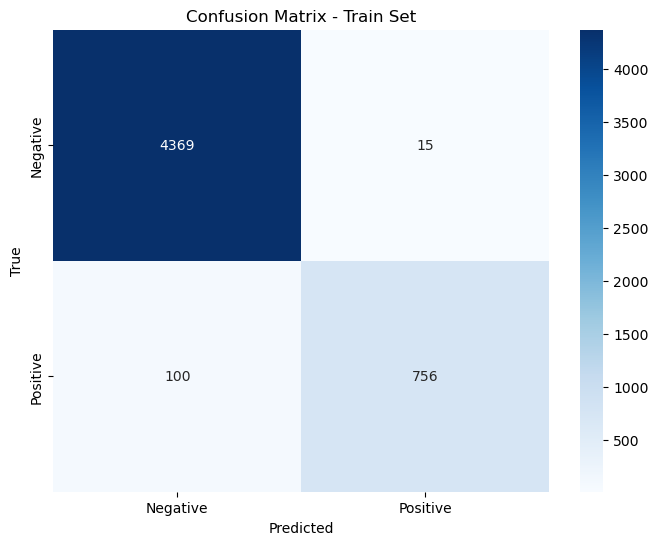

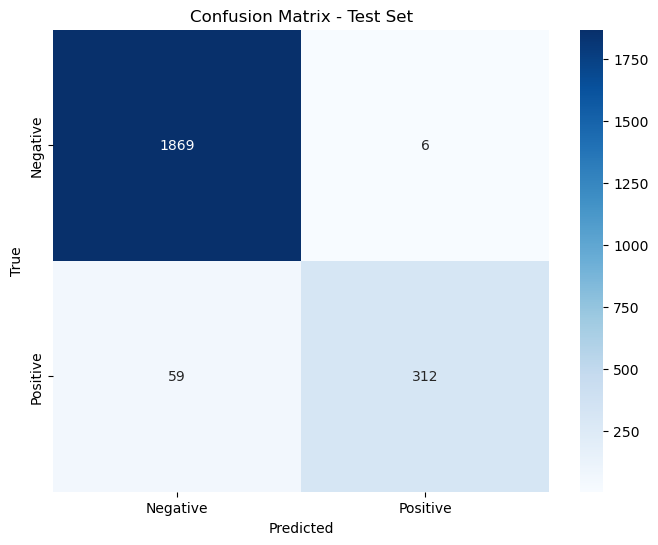

In [208]:





class LstmWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, lstm_model):
        self.lstm_model = lstm_model

    def fit(self, X, y):
        self.lstm_model.fit(X, y)
        return self

    def predict(self, X):
        return self.lstm_model.predict(X)
    
    def predict_proba(self, X):
        
        probabilities = self.lstm_model.predict(X)
        return np.column_stack([1 - probabilities, probabilities])


lstm_wrapper = LstmWrapper(lstm)


ensemble_model = VotingClassifier(
    estimators=[
        ('logistic_regression', l_r),
        ('lstm', lstm_wrapper)
    ],
    voting='soft'
)



# Train the ensemble model
ensemble_model.fit(x_train.toarray(), y_train)


train_predictions_proba = ensemble_model.predict_proba(x_train.toarray())
test_predictions_proba = ensemble_model.predict_proba(x_test.toarray())

# Convert predicted probabilities to class labels using a threshold (e.g., 0.5)
threshold = 0.5

train_predictions = (np.argmax(train_predictions_proba, axis=1) > threshold).astype("int32").flatten()
test_predictions = (np.argmax(test_predictions_proba, axis=1) > threshold).astype("int32").flatten()

# Evaluate the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

train_recall = recall_score(y_train, train_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')

train_precision = precision_score(y_train, train_predictions, average='weighted', zero_division=1)
test_precision = precision_score(y_test, test_predictions, average='weighted', zero_division=1)

train_f1 = f1_score(y_train, train_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

print(f"Ensemble Model Train Accuracy: {train_accuracy}")
print(f"Ensemble Model Test Accuracy: {test_accuracy}")

print(f"Ensemble Model Train Recall: {train_recall}")
print(f"Ensemble Model Test Recall: {test_recall}")

print(f"Ensemble Model Train F1 Score: {train_f1}")
print(f"Ensemble Model Test F1 Score: {test_f1}")

print(f"Ensemble Model Train Precision: {train_precision}")
print(f"Ensemble Model Test Precision: {test_precision}")

plot_confusion_matrix(y_train, train_predictions, title='Confusion Matrix - Train Set')
plot_confusion_matrix(y_test, test_predictions, title='Confusion Matrix - Test Set')
